In [1]:
import pandas as pd
import requests
import zipfile
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# URL del archivo .zip en la página web
url = 'http://www.dgis.salud.gob.mx/descargas/datosabiertos/urgencias/Urgencias_2023.zip?v=2024.05.06'

# Descargar el archivo .zip
response = requests.get(url)

# Diccionarios de mapeo para las columnas especificadas
sexo_mapping = {1: 'HOMBRE', 2: 'MUJER'}
derhab_mapping = {
    0: 'NO ESPECIFICADO', 1: 'NINGUNA', 2: 'IMSS', 3: 'ISSSTE', 4: 'PEMEX',
    5: 'SEDENA', 6: 'SEMAR', 8: 'OTRA', 10: 'IMSS BIENESTAR', 11: 'ISSFAM',
    13: 'INSABI', 'G': 'GRATUIDAD'
}
tipourgencia_mapping = {
    1: 'URGENCIA CALIFICADA', 2: 'URGENCIA NO CALIFICADA', 9: 'NO ESPECIFICADO'
}

# Extraer el contenido del archivo .zip y trabajar con los archivos dentro de él
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Obtener la lista de archivos dentro del .zip
    file_list = z.namelist()
    print("Archivos en el .zip:")
    for file_name in file_list:
        print(file_name)
    
    # Suponiendo que el archivo que deseas leer se llama 'Registros/Urgencias.txt'
    file_to_read = 'Registros/Urgencias.txt'
    if file_to_read in file_list:
        with z.open(file_to_read) as f:
            # Leer el archivo TXT usando Pandas con el delimitador '|'
            df = pd.read_csv(f, delimiter='|')  # Delimitador cambiado a '|'
            
            # Seleccionar solo las columnas necesarias
            df = df[['fechaingreso', 'hora_ingreso', 'EDAD', 'SEXO', 'DERHAB', 
                     'TIPOURGENCIA', 'fechaalta', 'hora_alta', 'ENTRESIDENCIA']]
            
            # Mapear los valores de las columnas especificadas
            df['SEXO'] = df['SEXO'].map(sexo_mapping)
            df['DERHAB'] = df['DERHAB'].map(derhab_mapping)
            df['TIPOURGENCIA'] = df['TIPOURGENCIA'].map(tipourgencia_mapping)
            
            # Filtrar por ENTRESIDENCIA igual a 26
            df = df[df['ENTRESIDENCIA'] == 26]
            
            # Convertir la columna 'fechaingreso' a tipo datetime y establecerla como índice
            df['fechaingreso'] = pd.to_datetime(df['fechaingreso'])
            df.set_index('fechaingreso', inplace=True)
            
            # Reiniciar el índice para que la columna 'fechaingreso' permanezca como una columna
            df.reset_index(inplace=True)
            
            # Mostrar las primeras y las ultimas filas del DataFrame después del formato
            print("Primeras filas del DataFrame después del formato:")
            print(df.head())
            print("Ultimas filas del DataFrame después del formato:")
            print(df.tail())
            
    else:
        print(f"El archivo {file_to_read} no se encuentra en el .zip")

Archivos en el .zip:
Registros/Afecciones.txt
Registros/Medicamentos.txt
Registros/Procedimientos.txt
Registros/Urgencias.txt


<ipython-input-2-05fcdb1697bb>:31: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delimiter='|')  # Delimitador cambiado a '|'


Primeras filas del DataFrame después del formato:
  fechaingreso hora_ingreso  EDAD    SEXO           DERHAB  \
0   2023-07-12        13:00    46   MUJER           INSABI   
1   2023-07-17        21:14    53   MUJER  NO ESPECIFICADO   
2   2023-08-06        17:41     6   MUJER          NINGUNA   
3   2023-08-14        15:56    62   MUJER             IMSS   
4   2023-01-20        14:38     2  HOMBRE          NINGUNA   

             TIPOURGENCIA   fechaalta hora_alta  ENTRESIDENCIA  
0  URGENCIA NO CALIFICADA  2023-07-12     13:20             26  
1  URGENCIA NO CALIFICADA  2023-07-17     22:14             26  
2     URGENCIA CALIFICADA  2023-08-06     19:37             26  
3     URGENCIA CALIFICADA  2023-08-14     17:15             26  
4     URGENCIA CALIFICADA  2023-01-20     15:52             26  
Ultimas filas del DataFrame después del formato:
       fechaingreso hora_ingreso  EDAD    SEXO           DERHAB  \
193254   2023-04-19        16:00    47   MUJER  NO ESPECIFICADO   
1932

<ipython-input-3-24341d2d6890>:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delimiter='|')  # Delimitador cambiado a '|'


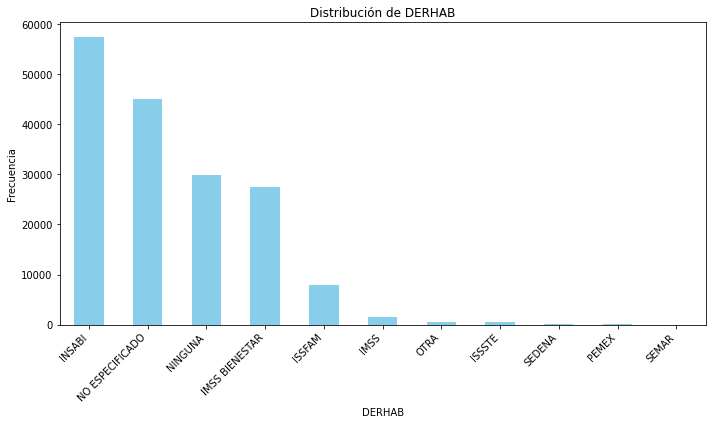

In [3]:
# Extraer el contenido del archivo .zip y trabajar con los archivos dentro de él
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Suponiendo que el archivo que deseas leer se llama 'Registros/Urgencias.txt'
    file_to_read = 'Registros/Urgencias.txt'
    if file_to_read in z.namelist():
        with z.open(file_to_read) as f:
            # Leer el archivo TXT usando Pandas con el delimitador '|'
            df = pd.read_csv(f, delimiter='|')  # Delimitador cambiado a '|'
            
            # Seleccionar solo la columna 'DERHAB'
            df['DERHAB'] = df['DERHAB'].map(derhab_mapping)
            
            # Filtrar por ENTRESIDENCIA igual a 26
            df = df[df['ENTRESIDENCIA'] == 26]
            
            # Graficar la distribución de 'DERHAB'
            plt.figure(figsize=(10, 6))
            df['DERHAB'].value_counts().plot(kind='bar', color='skyblue')
            plt.title('Distribución de DERHAB')
            plt.xlabel('DERHAB')
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
    else:
        print(f"El archivo {file_to_read} no se encuentra en el .zip")

In [4]:
# Lo que podemos observar en esta gráfica es que en las emergencias reportadas en Hermosillo, Sonora, México, 
# la gran mayoría de los casos los afectados son afiliados al Instituto de Salud para el Bienestar (INSABI). 
# La otra mayoría representa el poco control que se lleva respecto a esta información, ya que muestra que 
# no se fue especificado ya sea por negligencia al momento de tomar los datos o porque el afectado no presentó 
# dicha información. Los datos también demuestran indirectamente la gran cantidad de empleos informales que 
# existen en el país, dado que al no contar con una afiliación al sistema de salud, podemos inferir dicha suposición.

<ipython-input-5-b50b4e8d8a24>:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, delimiter='|')  # Delimitador cambiado a '|'


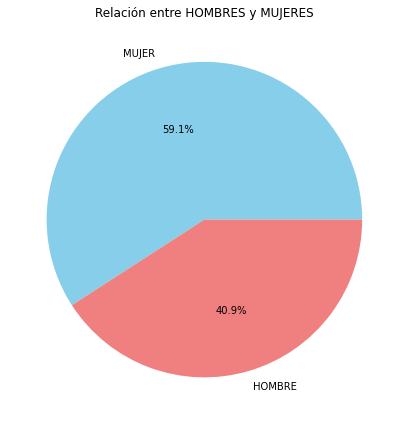

In [5]:
# Extraer el contenido del archivo .zip y trabajar con los archivos dentro de él
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Suponiendo que el archivo que deseas leer se llama 'Registros/Urgencias.txt'
    file_to_read = 'Registros/Urgencias.txt'
    if file_to_read in z.namelist():
        with z.open(file_to_read) as f:
            # Leer el archivo TXT usando Pandas con el delimitador '|'
            df = pd.read_csv(f, delimiter='|')  # Delimitador cambiado a '|'
            
            # Seleccionar solo la columna 'SEXO' y mapear los valores
            df['SEXO'] = df['SEXO'].map(sexo_mapping)
            
            # Filtrar por ENTRESIDENCIA igual a 26
            df = df[df['ENTRESIDENCIA'] == 26]
            
            # Contar el número de hombres y mujeres
            sexo_counts = df['SEXO'].value_counts()
            
            # Graficar la relación entre hombres y mujeres
            plt.figure(figsize=(6, 6))
            sexo_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
            plt.title('Relación entre HOMBRES y MUJERES')
            plt.ylabel('')
            plt.tight_layout()
            plt.show()
    else:
        print(f"El archivo {file_to_read} no se encuentra en el .zip")

In [6]:
# En este caso podemos observar que en las emergencias reportadas en Hermosillo, Sonora, México, 
# la gran mayoría de los casos los afectados son individuos del sexo femenino, y la minoría de 
# la gráfica es del sexo masculino, lo que resalta un punto importante ante la creencia de que 
# el sexo masculino tiende a tener más emergencias.